#            Problem Solving Module
<Br>
In this module, first we will learn how to calculate and plot 'Precentage Rainfall Anomaly' spatially from a netCDF (.nc) file using Python. 
<br>
<br>
So let us begin! 

First of all, we will import required libraries
<br>
Remember !!
<br>
-we need *xarray* library to deal with .nc files
<br>-Install *cartopy* library, otherwise your code will give error

In [1]:
import xarray as xr           #----xarray is used to open and read and manage .nc files
import numpy as np #--------we can perform various calculations using 'numpy' 
from scipy import stats #---For correlation calculation
# ----Libraries for visualisation and shapefile reading
import cartopy.crs as ccrs    
import cartopy.feature as cf
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Now we will call the .nc file
<br>
Sample file contain all India monthly rainfall values from 2001 to 2020.
<br>

We will use **.open_dataset()** function from 'xarray' library

In [2]:
# --- read netcdf file using xarray library
ds= xr.open_dataset('IMDmon_RF_2001_2020.nc')
ds

<xarray.Dataset>
Dimensions:    (TIME: 240, bnds: 2, LONGITUDE: 135, LATITUDE: 129)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2001-01-16 ... 2020-12-16
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) datetime64[ns] ...
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.0
    history:      Sat Sep 09 12:27:02 2023: cdo monmean IMD_RF_2001_2020.nc I...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

Main Advantage of netCDF file is that it contains the data as well as the metadata (Information like data origin, units of variable, resolution and other important details).

In [3]:
ds['RAINFALL']

<xarray.DataArray 'RAINFALL' (TIME: 240, LATITUDE: 129, LONGITUDE: 135)>
[4179600 values with dtype=float32]
Coordinates:
  * TIME       (TIME) datetime64[ns] 2001-01-16 ... 2020-12-16
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1901_rfp25.grd

In [4]:
# --- Define 'lons','lats' variables
lons = ds['LONGITUDE'][:]  
lats = ds['LATITUDE'][:] 

In [5]:
rf= xr.Dataset()#Create empty xarray.Dataset
rf
rf['Rainfall']=ds['RAINFALL'].sel(TIME=np.in1d(ds['TIME.month'],[6,7,8,9]))
rf

<xarray.Dataset>
Dimensions:    (TIME: 80, LONGITUDE: 135, LATITUDE: 129)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2001-06-15T12:00:00 ... 2020-09-15T12:00:00
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
Data variables:
    Rainfall   (TIME, LATITUDE, LONGITUDE) float32 ...

Here we will select June to September values from 2001 to 2010

In [6]:
rf2001_2010=rf.Rainfall[0:40,:,:]
rf2001_2010

<xarray.DataArray 'Rainfall' (TIME: 40, LATITUDE: 129, LONGITUDE: 135)>
[696600 values with dtype=float32]
Coordinates:
  * TIME       (TIME) datetime64[ns] 2001-06-15T12:00:00 ... 2010-09-15T12:00:00
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1901_rfp25.grd

We can also select months individually  

In [7]:
r_jun = rf2001_2010.sel(TIME=np.in1d(rf2001_2010['TIME.month'],[6])).values
r_jul = rf2001_2010.sel(TIME=np.in1d(rf2001_2010['TIME.month'],[7])).values
r_aug = rf2001_2010.sel(TIME=np.in1d(rf2001_2010['TIME.month'],[8])).values
r_sep = rf2001_2010.sel(TIME=np.in1d(rf2001_2010['TIME.month'],[9])).values
print(r_sep.shape)

(10, 129, 135)


In [8]:
r_JJAS=(r_jun+r_jul+r_aug+r_sep)
print(r_JJAS.shape)

(10, 129, 135)


To calculate Climatology, we will use **np.nanmean()** function from numpy library

In [9]:
clim=np.nanmean(r_JJAS,axis=0)
print(clim.shape)

(129, 135)


C:\Users\tanu3\AppData\Local\Temp\ipykernel_15548\1143404731.py:1: RuntimeWarning: Mean of empty slice
  clim=np.nanmean(r_JJAS,axis=0)


Now we will calculate percentage rainfall anomaly

In [10]:
ano_=((r_JJAS-clim)/clim)*100
ano=np.nanmean(ano_,axis=0)
print(ano.shape)

(129, 135)


C:\Users\tanu3\AppData\Local\Temp\ipykernel_15548\1880688674.py:1: RuntimeWarning: invalid value encountered in divide
  ano_=((r_JJAS-clim)/clim)*100
C:\Users\tanu3\AppData\Local\Temp\ipykernel_15548\1880688674.py:2: RuntimeWarning: Mean of empty slice
  ano=np.nanmean(ano_,axis=0)


### Percentage Rainfall Anomaly Spatial Plot

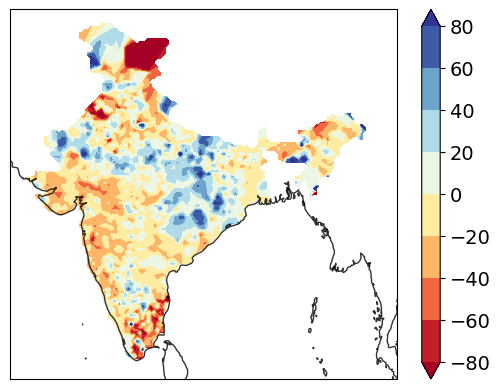

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
clevs = [-80,-60,-40,-20,0,20,40,60,80]#-----Color levels for color bar
vp_fill = plt.contourf(lons,lats,ano_[0,:,:],clevs,transform=ccrs.PlateCarree(),
                       cmap=plt.cm.RdYlBu,extend='both')
cbar=plt.colorbar(vp_fill, orientation='vertical')
cbar.ax.tick_params(labelsize=14)#----To adjust size of labels in color bar
plt.rcParams["figure.figsize"]=(12,9)
ax.coastlines(alpha=0.8)

Oceanic Nino Index (over the Nino3.4 region) from 2001 to 2020 is given below.
Data taken from https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php 

<br>**np.array([ ])** will create a 1-D numpy array.

In [12]:
ONI=np.array([-0.1,0.8,0.1,0.5,-0.1,0.1,-0.6,-0.4,0.5,-1,
                 -0.5,0.2,-0.4,0,1.5,-0.4,0.1,0.1,0.3,-0.4])
print(ONI.shape)

(20,)


Select data from 2001 to 2010

In [13]:
ONI2001_2010=ONI[0:10]
print(ONI2001_2010.shape)

(10,)


For correlation calculation, we will use **.spearmanr()** function from 'Scipy' Python library 

In [14]:
#ONI-Rainfall Spatial correlation 2001-2010
cr=np.empty((2,129,135))
for i in range(0,129):
    for j in range(0,135):
        cr[:,i,j]=stats.spearmanr(ano_[:,i,j],ONI2001_2010)
print(cr.shape)

(2, 129, 135)


Note that **.spearmanr()** function return correlation coefficient as well as the p-value (statistical significance)

### Spatial Correlation between Oceanic Nino Index and Rainfall

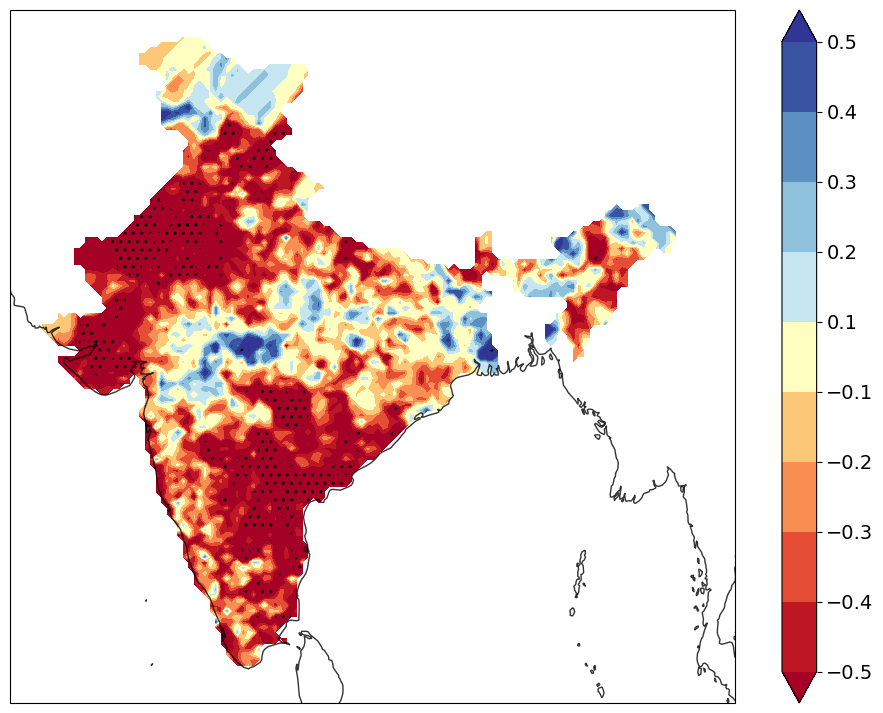

In [15]:
ax = plt.axes(projection=ccrs.PlateCarree())
clevs = [-0.5,-0.4,-0.3,-0.2,-0.1,0.1,0.2,0.3,0.4,0.5]#-----Color levels for color bar
vp_fill = plt.contourf(lons,lats,cr[0],clevs,transform=ccrs.PlateCarree(),
                       cmap=plt.cm.RdYlBu,extend='both')
cbar=plt.colorbar(vp_fill, orientation='vertical')
# plot p_values
ax.contourf(lons, lats, cr[1],levels=np.arange(0, 0.05, 0.01),
            transform=ccrs.PlateCarree(), hatches=['..'], alpha=0)
cbar.ax.tick_params(labelsize=14)#----To adjust size of labels in color bar
plt.rcParams["figure.figsize"]=(12,9)
ax.coastlines(alpha=0.8)

### Exercise
1. Calculate JJAS seasonal rainfall climatology from 2011 to 2020. From this climatology calculate and plot percentage rainfall anomaly for the year 2011.
2. Calculate and plot the correlation between ONI and JJAS rainfall for the period 2011-2020. 